# Clustering for Employee Retention

## Goal & Scope

**GOAL**: We are trying to better understand the company’s different segments of employees and how to increase employee retention within each segment.

**SCOPE**: Our task is to use a clustering technique to segment the employees, a dimensionality reduction technique to visualize the segments, and finally explore the clusters to make recommendations to increase retention.

## 1. Data Prep & EDA

### a. Data Prep: Check the data types

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
# read in the employee data
path = "G:/Study material/Data Science/ML/Unsupervised Learning/Data/employee_data.csv"

emp = pd.read_csv(path)

emp.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [208]:
# note the number of rows and columns

emp.shape

(1470, 10)

In [209]:
# view the data types of all the columns

emp.dtypes

EmployeeID            int64
Age                   int64
Gender               object
DistanceFromHome      int64
JobLevel              int64
Department           object
MonthlyIncome         int64
PerformanceRating     int64
JobSatisfaction       int64
Attrition            object
dtype: object

In [210]:
# look at the numeric columns

emp.select_dtypes("int").head()

,EmployeeID,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,1001,41,1,2,5993,3,4
1,1002,49,8,2,5130,4,2
2,1004,37,2,1,2090,3,3
3,1005,33,3,1,2909,3,3
4,1007,27,2,1,3468,3,2


In [211]:
emp.describe()

,EmployeeID,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2024.865306,36.923810,9.192517,2.063946,6502.931293,3.153741,2.728571
std,602.024335,9.135373,8.106864,1.106940,4707.956783,0.360824,1.102846
min,1001.000000,18.000000,1.000000,1.000000,1009.000000,3.000000,1.000000
25%,1491.250000,30.000000,2.000000,1.000000,2911.000000,3.000000,2.000000
50%,2020.500000,36.000000,7.000000,2.000000,4919.000000,3.000000,3.000000
75%,2555.750000,43.000000,14.000000,3.000000,8379.000000,3.000000,4.000000
max,3068.000000,60.000000,29.000000,5.000000,19999.000000,4.000000,4.000000


In [212]:
# look at the non-numeric columns

emp.select_dtypes("object").head()

,Gender,Department,Attrition
0,Female,Sales,Yes
1,Male,Research & Development,No
2,Male,Research & Development,Yes
3,Female,Research & Development,No
4,Male,Research & Development,No


### b. Data Prep: Convert the data types

We will use `np.where` and `pd.get_dummies` to create a DataFrame for modeling where all fields are numeric.

In [213]:
# create a copy of the dataframe

df = emp.copy()

df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [214]:
# look at the gender values
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [215]:
# change gender into a numeric field using np.where

df["Gender"] = np.where(df["Gender"]=="Female", 1, 0)

df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,1,1,2,Sales,5993,3,4,Yes
1,1002,49,0,8,2,Research & Development,5130,4,2,No
2,1004,37,0,2,1,Research & Development,2090,3,3,Yes
3,1005,33,1,3,1,Research & Development,2909,3,3,No
4,1007,27,0,2,1,Research & Development,3468,3,2,No


In [216]:
# look at the attrition values

df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [217]:
# change attrition to a numeric field using np.where

df["Attrition"] = np.where(df["Attrition"]=="Yes", 1, 0)

df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,1,1,2,Sales,5993,3,4,1
1,1002,49,0,8,2,Research & Development,5130,4,2,0
2,1004,37,0,2,1,Research & Development,2090,3,3,1
3,1005,33,1,3,1,Research & Development,2909,3,3,0
4,1007,27,0,2,1,Research & Development,3468,3,2,0


In [218]:
# look at the department values

df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [219]:
# change department to a numeric field via dummy variables

df = pd.get_dummies(df)

df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales
0,1001,41,1,1,2,5993,3,4,1,0,0,1
1,1002,49,0,8,2,5130,4,2,0,0,1,0
2,1004,37,0,2,1,2090,3,3,1,0,1,0
3,1005,33,1,3,1,2909,3,3,0,0,1,0
4,1007,27,0,2,1,3468,3,2,0,0,1,0


In [220]:
# note the number of rows and columns

df.shape

(1470, 12)

### c. EDA

Our goal is to find the different types of employees at the company and take a look at their attrition (whether they end up leaving or not).

In [221]:
# what is the overall attrition for all employees in the data aka what percent of employees leave the company?

round(df['Attrition'].mean()*100, 2)

16.12

In [222]:
# create a summary table to show the mean of each column for employees who stay vs leave - what are your takeaways?

df.groupby('Attrition').mean()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Department_Human Resources,Department_Research & Development,Department_Sales
Attrition,,,,,,,,,,,
0,2027.656123,37.561233,0.406326,8.915653,2.145985,6832.739659,3.153285,2.778589,0.041363,0.671533,0.287105
1,2010.345992,33.607595,0.367089,10.632911,1.637131,4787.092827,3.156118,2.468354,0.050633,0.561181,0.388186


* **Takeawyas**: People who stay tend to be older, female, stay close to office, more senior, high salary and work in research and development department

### d. Data Prep: Remove the Attrition and ID Columns

Exclude the attrition column and the ID column.

In [223]:
# create a new dataframe without the attrition and EmployeeID columns for us to model on

data = df.drop(["Attrition","EmployeeID"], axis=1)

data.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,1,2,5993,3,4,0,0,1
1,49,0,8,2,5130,4,2,0,1,0
2,37,0,2,1,2090,3,3,0,1,0
3,33,1,3,1,2909,3,3,0,1,0
4,27,0,2,1,3468,3,2,0,1,0


In [224]:
# note the number of rows and columns in the dataframe

data.shape

(1470, 10)

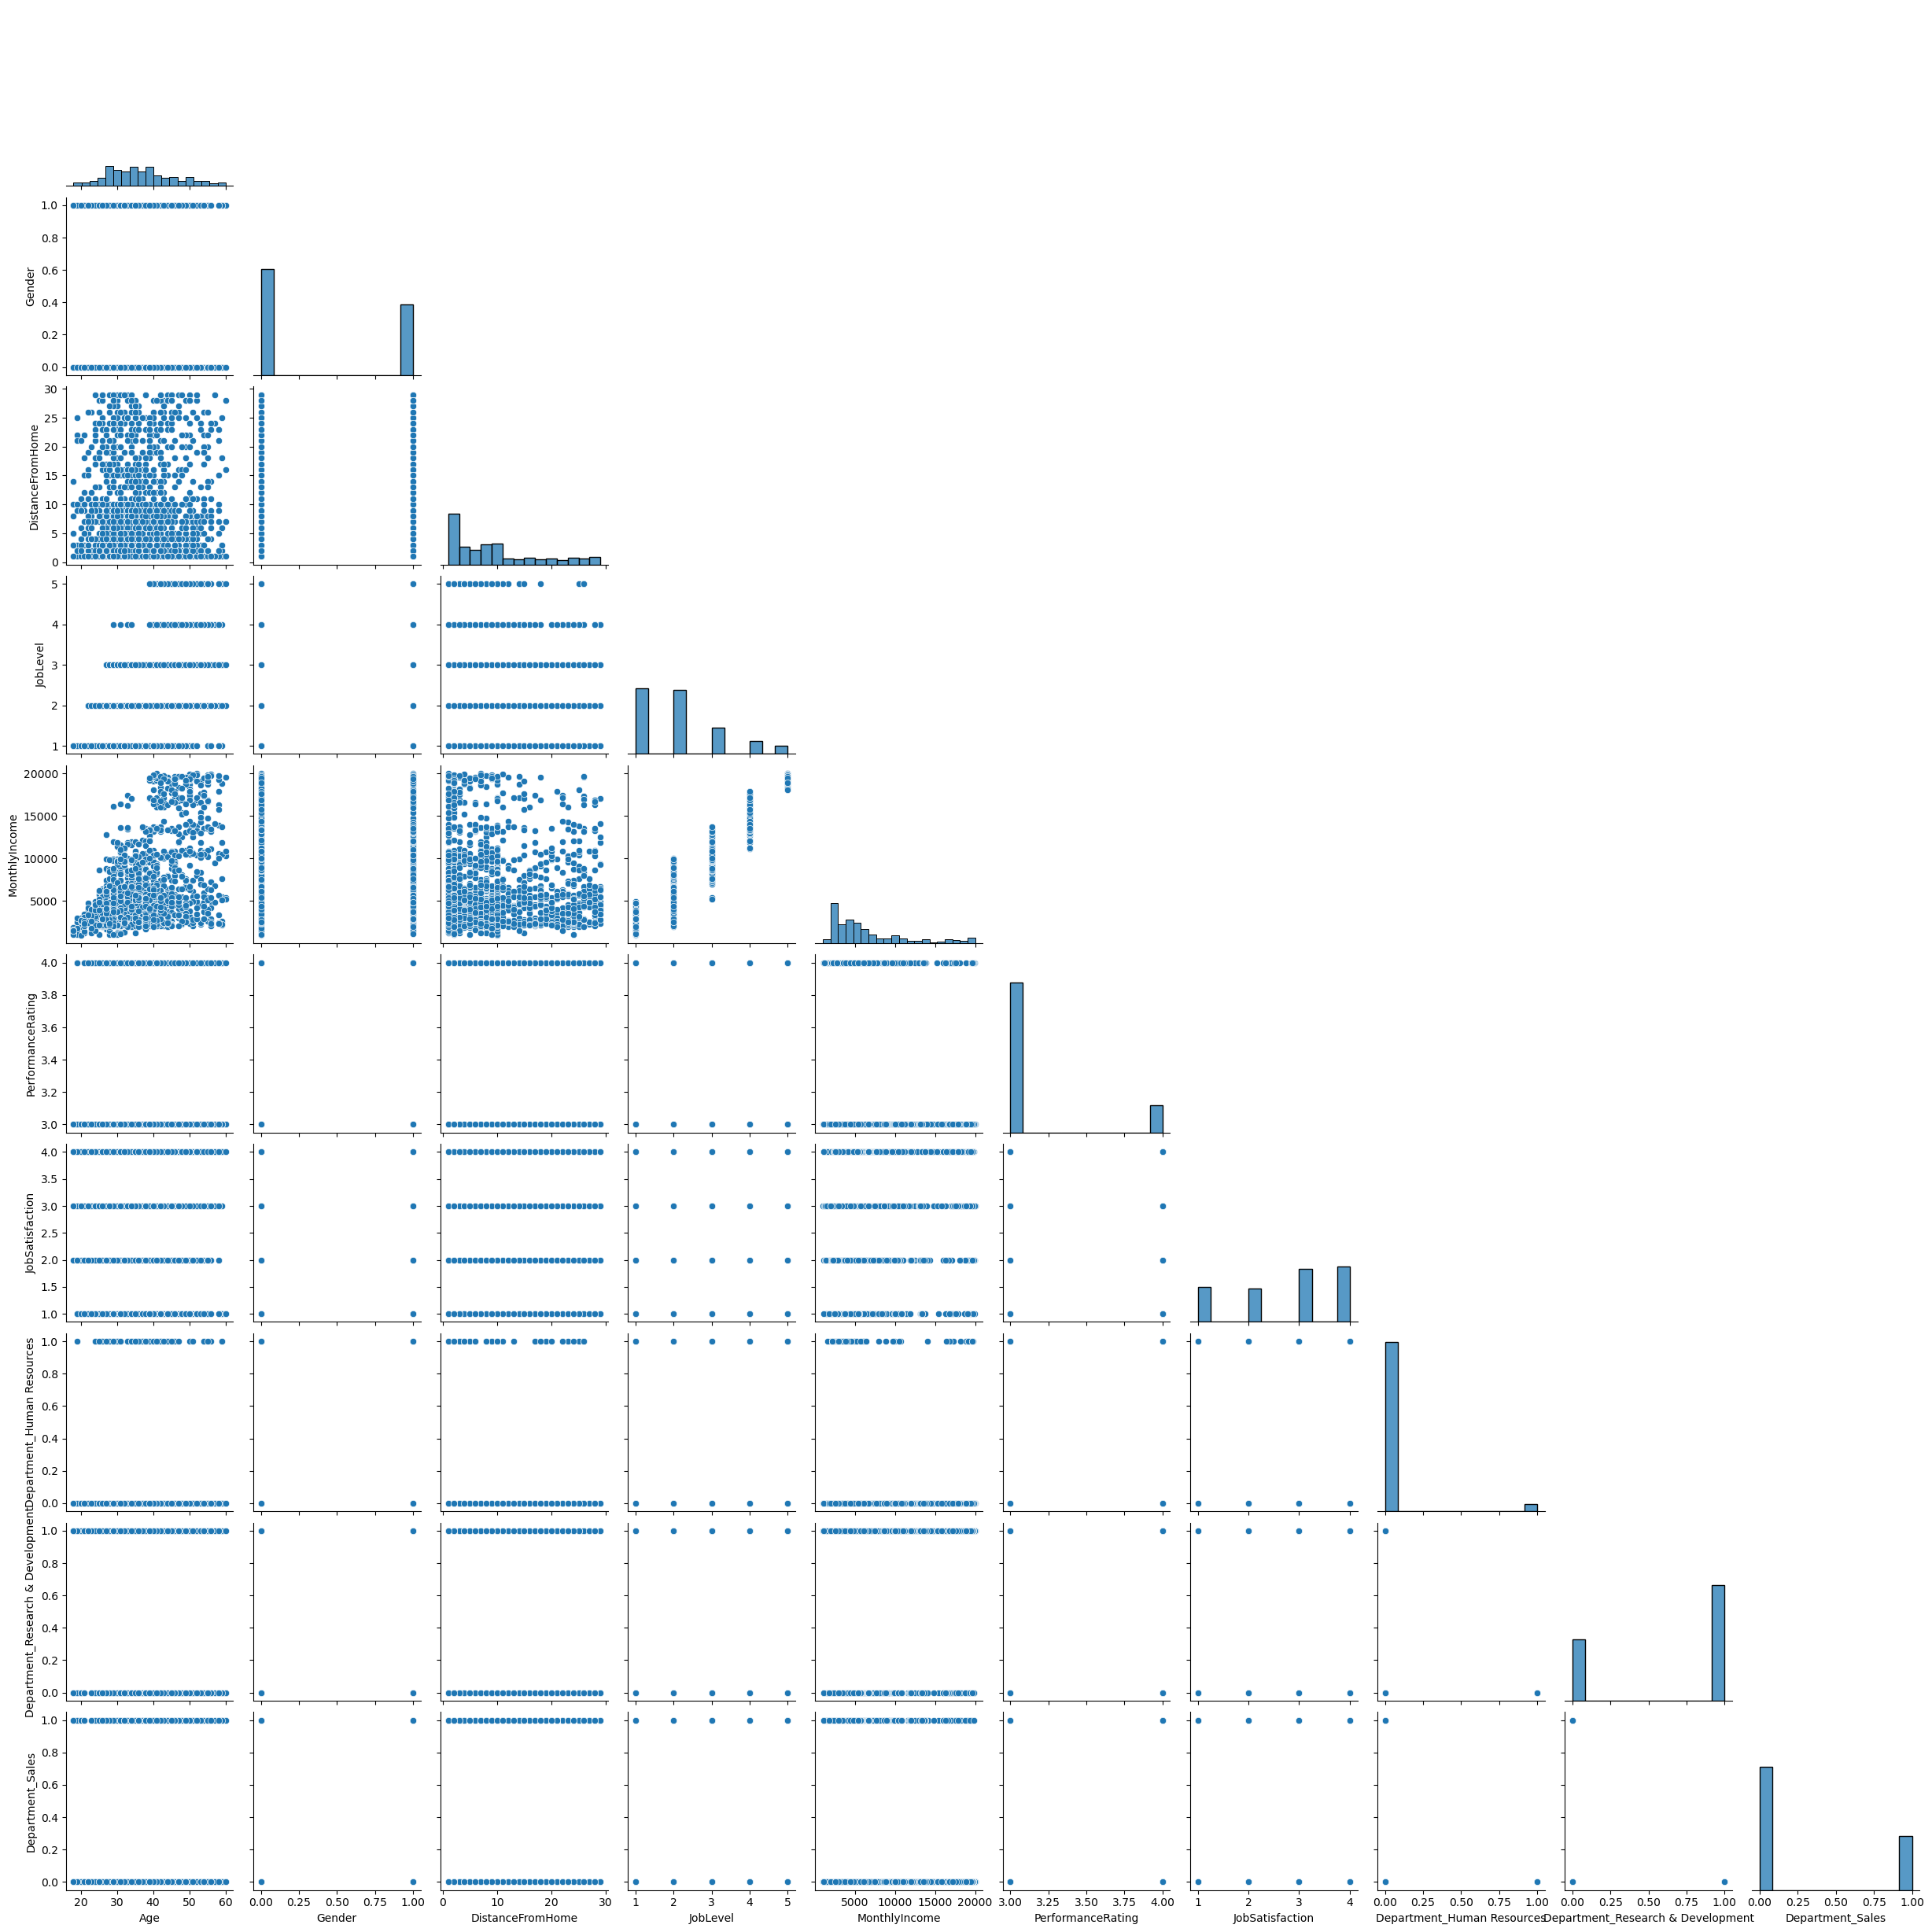

In [225]:
# create a pair plot comparing all the columns of the dataframe - what observations do you notice?

sns.pairplot(data, corner=True);

### OBSERVATIONS:
* Age and gender seem to be pretty evenly distributed
* More people live closer to the office
* Job level and income are correlated
* There are fewer high performers
* Most people are happy with the jobs
* There are few people in HR compared to the other departments

## 2. K-Means Clustering

Let's segment the employees using K-Means clustering.

### a. Standardize the data

In [226]:
# scale the data using standardization
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

df_std = std.fit_transform(data)

df_std = pd.DataFrame(df_std, columns=data.columns)

df_std.head()


,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Department_Human Resources,Department_Research & Development,Department_Sales
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254,-0.211604,-1.374051,1.515244
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853,-0.211604,0.727775,-0.659960
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200,-0.211604,0.727775,-0.659960
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200,-0.211604,0.727775,-0.659960
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853,-0.211604,0.727775,-0.659960


In [227]:
# double check that all the column means are 0 and standard deviations are 1

df_std.describe()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Department_Human Resources,Department_Research & Development,Department_Sales
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,-4.350262e-17,4.350262e-17,-2.658493e-17,-4.471102e-17,-6.114534e-16,-9.183886e-17,6.767074e-17,2.900174e-17,8.458842e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-8.164966e-01,-1.010909e+00,-9.614864e-01,-1.167343e+00,-4.262300e-01,-1.567907e+00,-2.116037e-01,-1.374051e+00,-6.599598e-01
25%,-7.581700e-01,-8.164966e-01,-8.875151e-01,-9.614864e-01,-7.632087e-01,-4.262300e-01,-6.608532e-01,-2.116037e-01,-1.374051e+00,-6.599598e-01
50%,-1.011589e-01,-8.164966e-01,-2.705440e-01,-5.778755e-02,-3.365516e-01,-4.262300e-01,2.462002e-01,-2.116037e-01,7.277751e-01,-6.599598e-01
75%,6.653541e-01,1.224745e+00,5.932157e-01,8.459113e-01,3.986245e-01,-4.262300e-01,1.153254e+00,-2.116037e-01,7.277751e-01,1.515244e+00
max,2.526886e+00,1.224745e+00,2.444129e+00,2.653309e+00,2.867626e+00,2.346151e+00,1.153254e+00,4.725816e+00,7.277751e-01,1.515244e+00


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [228]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_score = []
silhouette_scores = []

for k in np.arange(2, 16):
    
    kmean = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmean.fit(df_std)
    inertia = kmean.inertia_
    inertia_score.append(inertia)
    silhouette_scores.append(silhouette_score(df_std, kmean.labels_, metric='euclidean', sample_size=None))

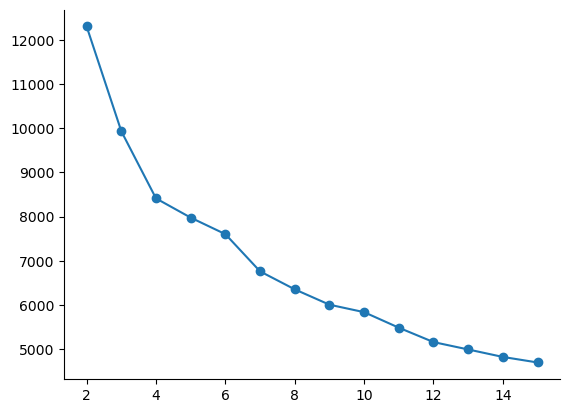

In [229]:
## Plot the inertia values

import matplotlib.pyplot as plt
import seaborn as sns

inertia_series = pd.Series(inertia_score, index=range(2,16))

fig, ax = plt.subplots()

ax.plot(inertia_series, marker='o')

sns.despine()

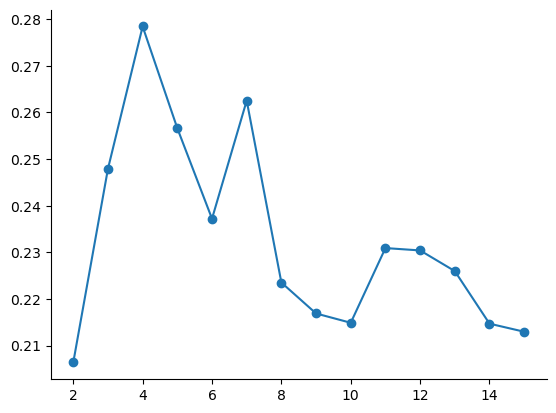

In [230]:
fig, ax = plt.subplots()

ax.plot(pd.Series(silhouette_scores, index=range(2,16)), marker='o')

sns.despine()

### c. Identify a k value that looks like an elbow on the inertia plot and has a high silhouette score

In [231]:
# fit a kmeans model for the k value that you identified

kmeans4 = KMeans(n_clusters=4, n_init='auto', random_state=42)

kmeans4.fit(df_std)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [232]:
# find the number of employees in each cluster

pd.Series(kmeans4.labels_).value_counts()

1    747
3    407
2    253
0     63
dtype: int64

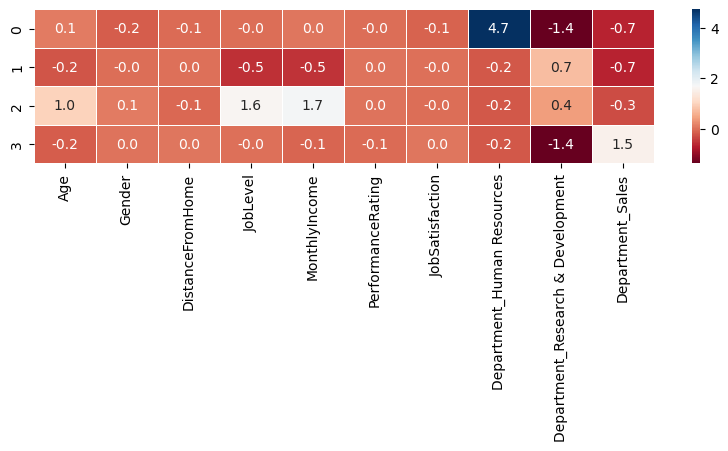

In [233]:
# create a heat map of the cluster centers

clusters4 = pd.DataFrame(kmeans4.cluster_centers_, columns=df_std.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(clusters4, annot=True, cmap="RdBu", fmt=".1f", linewidths=0.5);

### Interpret the clusters

* **Cluster 0** : More HR employees and less R&D
* **Cluster 1** : Lower age, low joblevel & income and lower employees from HR and sales department and higher employees from R&D 
* **Cluster 2** : More age, high joblevel and income and and lower employees from HR and sales department and higher employees  from R&D
* **Cluster 3** : More Sales employees and less from R&D

## 3. PCA

Let's visualize the data using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [234]:
# fit a PCA model with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df_std)

PCA(n_components=2)

In [235]:
# view the explained variance ratio

pca.explained_variance_ratio_

array([0.23793893, 0.18883434])

In [236]:
# view the components

pca.components_

array([[ 0.43287352,  0.04877625, -0.00285089,  0.60509274,  0.59445012,
        -0.02556521, -0.00472736,  0.02964393, -0.21392918,  0.20833797],
       [-0.21384802,  0.00840873,  0.01653328, -0.14533326, -0.17730123,
        -0.04153184,  0.01140416,  0.11374447, -0.67887246,  0.65246219]])

In [237]:
# view the columns

pd.DataFrame(pca.components_, columns=df_std.columns)

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Department_Human Resources,Department_Research & Development,Department_Sales
0,0.432874,0.048776,-0.002851,0.605093,0.594450,-0.025565,-0.004727,0.029644,-0.213929,0.208338
1,-0.213848,0.008409,0.016533,-0.145333,-0.177301,-0.041532,0.011404,0.113744,-0.678872,0.652462


### interpret the components

* **PC1**: High age, most female, high joblevel, high income = Senior Employees
* **PC2**: Lower R&D, higher sales

### b. Overlay the K-Means cluster colors

In [238]:
# transform the data

pca_transform = pd.DataFrame((pca.transform(df_std)), columns=["PC1","PC2"])

pca_transform.head()

,PC1,PC2
0,0.765263,1.853973
1,-0.031684,-1.285674
2,-1.462588,-0.645564
3,-1.449531,-0.563547
4,-1.758252,-0.473654


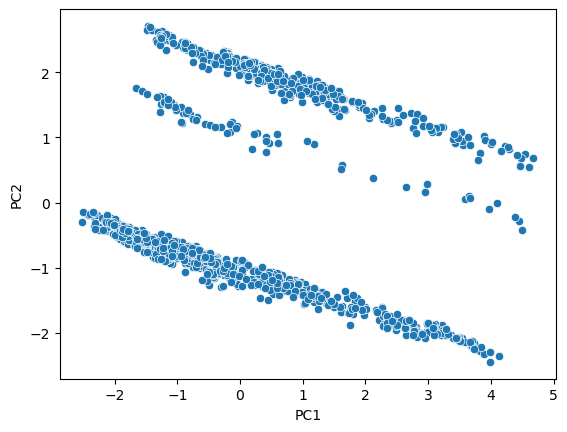

In [239]:
# plot the data

sns.scatterplot(x="PC1", y="PC2", data=pca_transform);

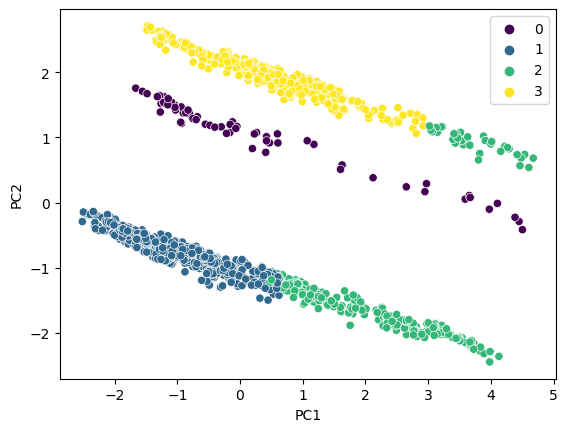

In [240]:
# overlay the kmeans clusters (hint: set the hue to be the cluster labels)

sns.scatterplot(x="PC1", y="PC2", data=pca_transform, hue=kmeans4.labels_, palette='viridis');

### c. Overlay the Department colors instead

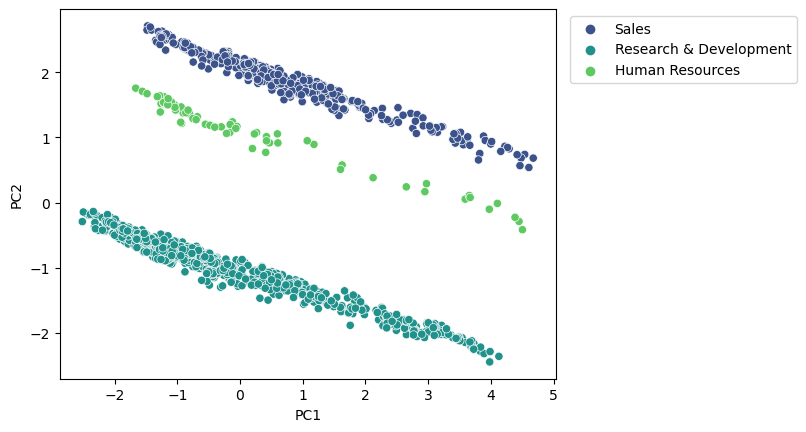

In [241]:
# overlay the department colors (hint: set the hue to be the department column)

sns.scatterplot(x="PC1", y="PC2", data=pca_transform, hue=emp["Department"], palette='viridis')

plt.legend(bbox_to_anchor=(1.5,1))

plt.show()

## 4. K-Means Clustering: Round 2

Since the departments seemed to dominate the visualization, let's exclude them and try fitting more K-Means models.

### a. Create a new dataframe without the Departments

In [242]:
# create a new dataframe that excludes the three department columns from the scaled dataframe

df_std2 = df_std.iloc[:, :7]

df_std2.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [243]:
# write a loop to fit models with 2 to 15 clusters

inertia_score2 = []
silhouette_scores2 = []

for k in np.arange(2, 16):
    
    kmean = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmean.fit(df_std2)
    inertia = kmean.inertia_
    inertia_score2.append(inertia)
    silhouette_scores2.append(silhouette_score(df_std2, kmean.labels_, metric='euclidean', sample_size=None))


In [244]:
inertia_score2

[7892.816806225552,
 6646.66880707002,
 5902.790214899375,
 5168.889497027336,
 4724.78797040159,
 4687.967925076498,
 4264.936927883052,
 4082.063653876304,
 3839.6805873207404,
 3624.54560322738,
 3490.270148735078,
 3369.356991385221,
 3234.9960328381926,
 3114.096290483777]

In [245]:
pd.Series(inertia_score2, index=range(2,16))

2     7892.816806
3     6646.668807
4     5902.790215
5     5168.889497
6     4724.787970
7     4687.967925
8     4264.936928
9     4082.063654
10    3839.680587
11    3624.545603
12    3490.270149
13    3369.356991
14    3234.996033
15    3114.096290
dtype: float64

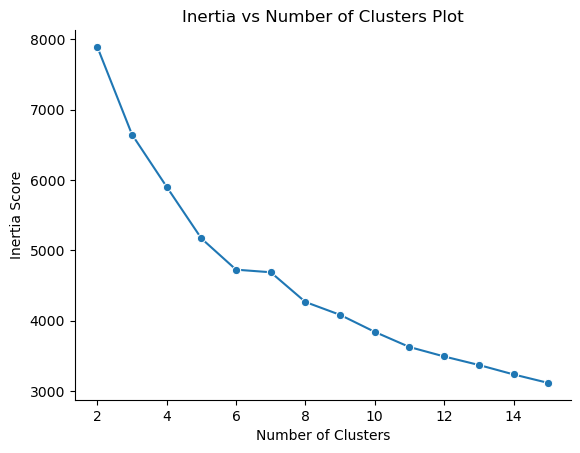

In [246]:
# plot the inertia values

pd.Series(inertia_score2, index=range(2,16))

sns.lineplot(pd.Series(inertia_score2, index=range(2,16)), marker="o");

plt.title("Inertia vs Number of Clusters Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Score")

sns.despine()

In [247]:
pd.Series(silhouette_scores2, index=range(2,16))

2     0.273833
3     0.280255
4     0.192937
5     0.221383
6     0.219075
7     0.216586
8     0.224669
9     0.213949
10    0.215158
11    0.230066
12    0.230206
13    0.229374
14    0.222900
15    0.223139
dtype: float64

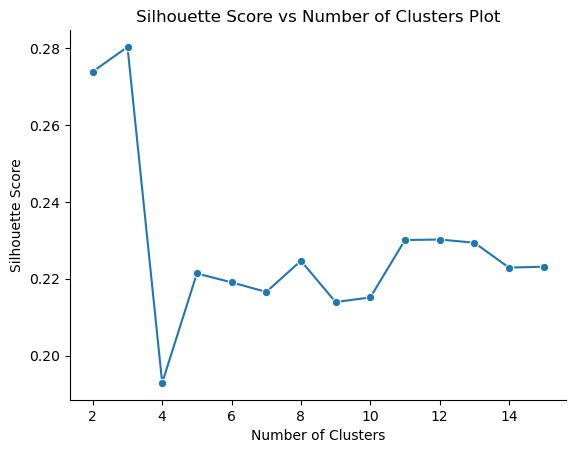

In [248]:
sns.lineplot(pd.Series(silhouette_scores2, index=range(2,16)), marker='o')

plt.title("Silhouette Score vs Number of Clusters Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

sns.despine()

### c. Identify a few k values that looks like an elbow on the inertia plot and have a high silhouette score

#### i. k = 3

In [249]:
# fit a kmeans model for the k value that you identified

kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)

kmeans3.fit(df_std2)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [250]:
# find the number of employees in each cluster

dict(pd.Series(kmeans3.labels_).value_counts())

{2: 990, 0: 280, 1: 200}

In [251]:
kmeans3.inertia_

6646.66880707002

In [252]:
silhouette_score(df_std2, kmeans3.labels_, metric="euclidean", sample_size=None)

0.28025537795270794

<Axes: >

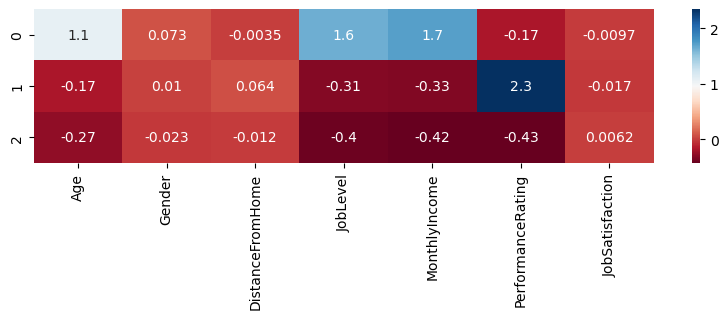

In [253]:
# create a heat map of the cluster centers

plt.figure(figsize=(10, 2))
sns.heatmap(pd.DataFrame(kmeans3.cluster_centers_, columns=df_std2.columns),
           annot=True,
           cmap='RdBu')

### interpret the clusters

* **Cluster 0**: High income, high joblevel and more age == Seniors
* **Cluster 1**: High Performers 
* **Cluster 2**: Low performer, low income, low joblevel, low age == Junior


#### ii. k = 5

In [254]:
# fit a kmeans model for the k value that you identified

kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)

kmeans5.fit(df_std2)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [255]:
# find the number of employees in each cluster

dict(pd.Series(kmeans5.labels_).value_counts())

{2: 398, 4: 328, 3: 316, 0: 228, 1: 200}

In [256]:
kmeans5.inertia_

5168.889497027336

In [257]:
silhouette_score(df_std2, kmeans5.labels_, metric="euclidean", sample_size=None)

0.22138255770519957

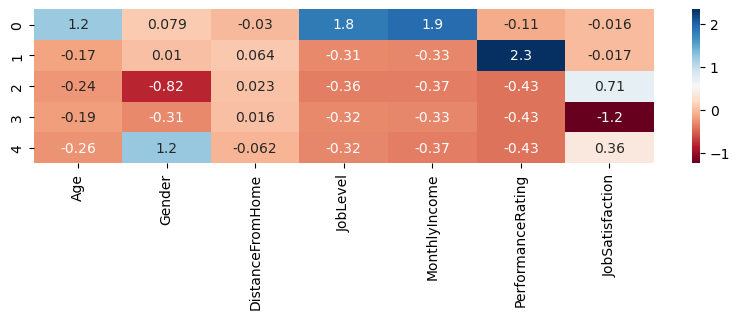

In [258]:
# create a heat map of the cluster centers

plt.figure(figsize=(10, 2))
sns.heatmap(pd.DataFrame(kmeans5.cluster_centers_, columns=df_std2.columns),
           annot=True,
           cmap='RdBu');

### interpret the clusters

* **Cluster 0**: Senior Employees with high income and job level     
* **Cluster 1**: High performer    
* **Cluster 2**: More male employees with high job satisfaction 
* **Cluster 3**: Low job satisfaction 
* **Cluster 4**: More female employees with moderate job satisfaction

#### ii. k = 8

In [259]:
# fit a kmeans model for the k value that you identified

kmeans8 = KMeans(n_clusters=8, n_init='auto', random_state=42)

kmeans8.fit(df_std2)

KMeans(n_init='auto', random_state=42)

In [260]:
# find the number of employees in each cluster

dict(pd.Series(kmeans8.labels_).value_counts())

{1: 306, 4: 221, 0: 209, 2: 202, 7: 178, 3: 149, 5: 112, 6: 93}

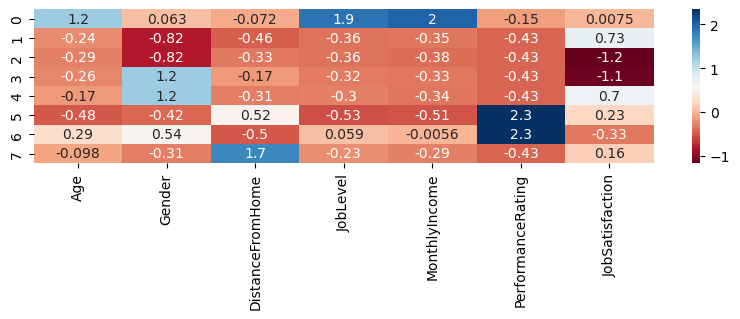

In [261]:
# create a heat map of the cluster centers

plt.figure(figsize=(10, 2))
sns.heatmap(pd.DataFrame(kmeans8.cluster_centers_, columns=df_std2.columns),
           annot=True,
           cmap='RdBu');

### Interpret the clusters:
* **Cluster 0**: Senior Employees with high income and job level       
* **Cluster 1**: Men who like their jobs
* **Cluster 2**: Men who dislike their jobs      
* **Cluster 3**: Women who dislike their jobs
* **Cluster 4**: Women who like their jobs
* **Cluster 5**: More high performer men
* **Cluster 6**: More high performer women
* **Cluster 7**: long commuters

## 5. PCA: Round 2

Let's visualize the data (without Departments) using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [262]:
# fit a PCA model with 2 components

pca2 = PCA(n_components=2)

pca2.fit(df_std2)

PCA(n_components=2)

In [263]:
# view the explained variance ratio

sum(pca2.explained_variance_ratio_)

0.48204546371348655

In [264]:
# view the components

pd.DataFrame(pca2.components_, columns=df_std2.columns)

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,0.471243,0.046063,-0.006297,0.623931,0.621404,-0.016880,-0.007127
1,0.018969,0.586159,0.414054,-0.018388,-0.027781,0.483317,-0.499911


In [265]:
# view the columns

df_std2.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction'],
      dtype='object')

### Interpret the components

* **PC1**: Senior employees, mostly male, stay close to office, high income, high statisfaction but low in performance
* **PC2**: Junior employees, mostly female, stay far from office, low income and high performer but not satisfied


### b. Overlay the K-Means cluster colors

In [268]:
# transform the data

pca2_transformed = pd.DataFrame(pca2.transform(df_std2), columns=["PC1", "PC2"])
pca2_transformed.head()

,PC1,PC2
0,0.168712,-0.470665
1,0.334248,0.959030
2,-1.205213,-1.131272
3,-1.210236,0.103169
4,-1.532824,-0.706731


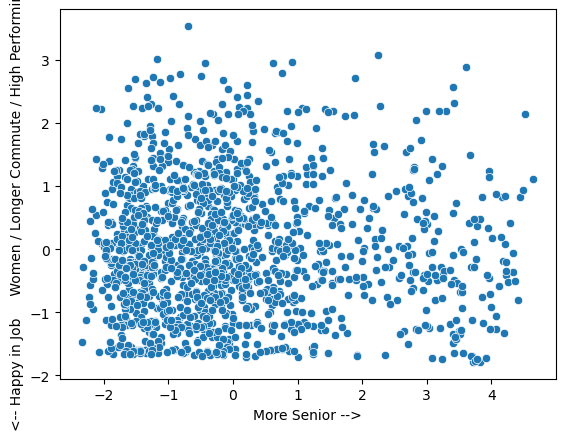

In [269]:
# plot the data

sns.scatterplot(x="PC1", y="PC2", data=pca2_transformed)

plt.xlabel('More Senior -->')
plt.ylabel('<-- Happy in Job     Women / Longer Commute / High Performing -->');

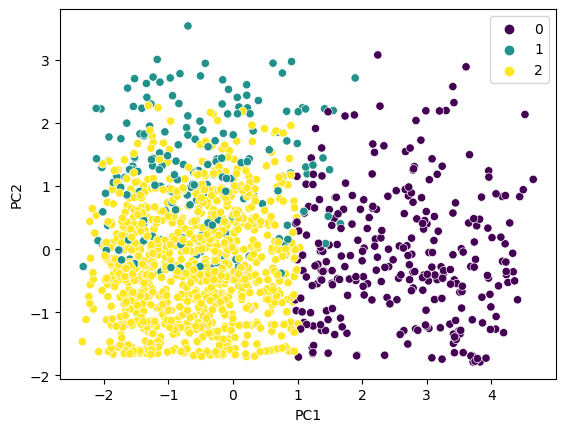

In [270]:
# overlay the kmeans clusters (choose your favorite k-means model from the previous section)

sns.scatterplot(x="PC1", y="PC2", data=pca2_transformed, hue=kmeans3.labels_, palette='viridis');

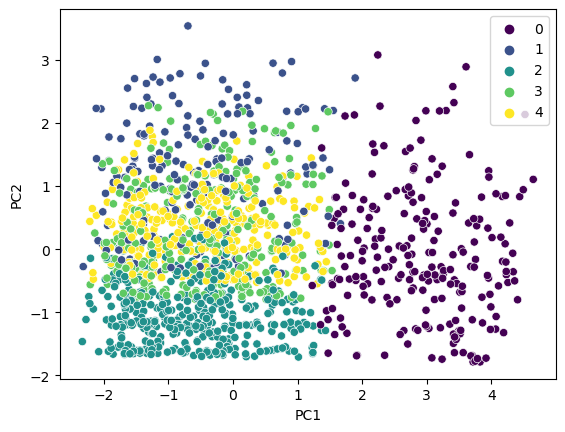

In [271]:
sns.scatterplot(x="PC1", y="PC2", data=pca2_transformed, hue=kmeans5.labels_, palette='viridis');

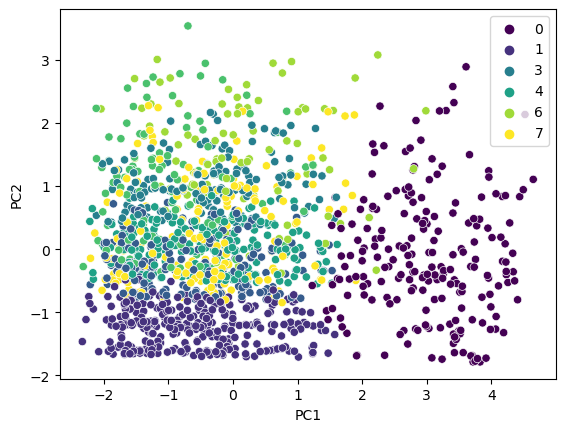

In [272]:
sns.scatterplot(x="PC1", y="PC2", data=pca2_transformed, hue=kmeans8.labels_, palette='viridis');

## 6. EDA on Clusters

Let's decide to go with the 8 clusters without department data.

### a. Confirm the 8 clusters

In [273]:
# fit a kmeans model with 6 clusters

kmeans8 = KMeans(n_clusters=8, n_init='auto', random_state=42)

kmeans8.fit(df_std2)

KMeans(n_init='auto', random_state=42)

In [274]:
# view the cluster labels
kmeans8.labels_

array([4, 6, 1, ..., 5, 2, 1])

### b. Create a dataframe with the cluster labels and names

In [275]:
# create a dataframe with two columns - one of the label and another of the cluster name

clusters = pd.DataFrame(kmeans8.labels_, columns=['Labels'])

clusters.head()

,Labels
0,4
1,6
2,1
3,4
4,2


In [276]:
# create a mapping for the cluster names

cluster_mapping = {0 : 'Senior employees',
                   1 : 'Men who like their jobs',
                   2 : 'Men who dislike their jobs',
                   3 : 'Women who dislike their jobs',
                   4 : 'Women who like their jobs',
                   5 : 'More high performer men',
                   6 : 'More high performer women',
                   7 : 'long commuters'}

In [277]:
# combine the labels and names into a single dataframe

clusters["Cluster_name"] = clusters["Labels"].map(cluster_mapping)

clusters.head()

,Labels,Cluster_name
0,4,Women who like their jobs
1,6,More high performer women
2,1,Men who like their jobs
3,4,Women who like their jobs
4,2,Men who dislike their jobs


### c. View the attrition rates for each cluster

In [278]:
# combine the clusters and attrition data

clusters = clusters.merge(df["Attrition"], left_index=True, right_index=True)
clusters.head()

,Labels,Cluster_name,Attrition
0,4,Women who like their jobs,1
1,6,More high performer women,0
2,1,Men who like their jobs,1
3,4,Women who like their jobs,0
4,2,Men who dislike their jobs,0


In [279]:
# what is the attrition rate for each cluster?

clusters.groupby("Cluster_name").agg({"Attrition":"mean"})

,Attrition
Cluster_name,
Men who dislike their jobs,0.188119
Men who like their jobs,0.160131
More high performer men,0.232143
More high performer women,0.118280
Senior employees,0.076555
Women who dislike their jobs,0.181208
Women who like their jobs,0.144796
long commuters,0.213483


In [280]:
# sort the values

clusters.groupby("Cluster_name").agg({"Attrition":"mean"}).sort_values("Attrition", ascending=False)

,Attrition
Cluster_name,
More high performer men,0.232143
long commuters,0.213483
Men who dislike their jobs,0.188119
Women who dislike their jobs,0.181208
Men who like their jobs,0.160131
Women who like their jobs,0.144796
More high performer women,0.118280
Senior employees,0.076555


### interpret the findings

* More high performer men most likely to leave
* Senior employees most likely to stay


In [281]:
# find the number of employees in each cluster

clusters["Cluster_name"].value_counts()

Men who like their jobs         306
Women who like their jobs       221
Senior employees                209
Men who dislike their jobs      202
long commuters                  178
Women who dislike their jobs    149
More high performer men         112
More high performer women        93
Name: Cluster_name, dtype: int64

### d. View the department breakdown for each cluster

In [282]:
# combine the clusters and department data

clusters_dept = clusters.merge(emp["Department"], left_index=True, right_index=True)
clusters_dept.head()

,Labels,Cluster_name,Attrition,Department
0,4,Women who like their jobs,1,Sales
1,6,More high performer women,0,Research & Development
2,1,Men who like their jobs,1,Research & Development
3,4,Women who like their jobs,0,Research & Development
4,2,Men who dislike their jobs,0,Research & Development


In [283]:
# what is the attrition rate for each cluster + department combination?

clusters_dept.groupby(["Cluster_name","Department"]).agg({"Attrition":"mean"})

Attrition
Cluster_name                 Department                       
Men who dislike their jobs   Human Resources          0.214286
                             Research & Development   0.170732
                             Sales                    0.215385
Men who like their jobs      Human Resources          0.071429
                             Research & Development   0.150754
                             Sales                    0.193548
More high performer men      Human Resources          0.200000
                             Research & Development   0.237500
                             Sales                    0.222222
More high performer women    Human Resources          0.000000
                             Research & Development   0.112903
                             Sales                    0.137931
Senior employees             Human Resources          0.000000
                             Research & Development   0.062937
                             Sales                    0.129630
Women who dislike their jobs Human Resources          0.428571
                             Research & Development   0.140000
                             Sales                    0.238095
Women who like their jobs    Human Resources          0.500000
                             Research & Development   0.096296
                             Sales                    0.200000
long commuters               Human Resources          0.333333
                             Research & Development   0.168067
                             Sales                    0.303571

In [284]:
# sort the values

clusters_dept.groupby(["Cluster_name","Department"]).agg({"Attrition":"mean"}).sort_values("Attrition", ascending=False)

Attrition
Cluster_name                 Department                       
Women who like their jobs    Human Resources          0.500000
Women who dislike their jobs Human Resources          0.428571
long commuters               Human Resources          0.333333
                             Sales                    0.303571
Women who dislike their jobs Sales                    0.238095
More high performer men      Research & Development   0.237500
                             Sales                    0.222222
Men who dislike their jobs   Sales                    0.215385
                             Human Resources          0.214286
More high performer men      Human Resources          0.200000
Women who like their jobs    Sales                    0.200000
Men who like their jobs      Sales                    0.193548
Men who dislike their jobs   Research & Development   0.170732
long commuters               Research & Development   0.168067
Men who like their jobs      Research & Development   0.150754
Women who dislike their jobs Research & Development   0.140000
More high performer women    Sales                    0.137931
Senior employees             Sales                    0.129630
More high performer women    Research & Development   0.112903
Women who like their jobs    Research & Development   0.096296
Men who like their jobs      Human Resources          0.071429
Senior employees             Research & Development   0.062937
More high performer women    Human Resources          0.000000
Senior employees             Human Resources          0.000000

### Interpret the findings

* People most likely to leave are long commuters, female in HR and HR & sale dept
* People most likely to not leave are senior employees, high performer women and work in R&D and HR and R&D dept

In [285]:
# find the number of employees in each cluster + department combo

clusters_dept.groupby(["Cluster_name","Department"]).agg(emp = ("Attrition","count"),
                                                        Attrition = ("Attrition","mean")).sort_values("Attrition", ascending=False)
                                                         

emp  Attrition
Cluster_name                 Department                            
Women who like their jobs    Human Resources           6   0.500000
Women who dislike their jobs Human Resources           7   0.428571
long commuters               Human Resources           3   0.333333
                             Sales                    56   0.303571
Women who dislike their jobs Sales                    42   0.238095
More high performer men      Research & Development   80   0.237500
                             Sales                    27   0.222222
Men who dislike their jobs   Sales                    65   0.215385
                             Human Resources          14   0.214286
More high performer men      Human Resources           5   0.200000
Women who like their jobs    Sales                    80   0.200000
Men who like their jobs      Sales                    93   0.193548
Men who dislike their jobs   Research & Development  123   0.170732
long commuters               Research & Development  119   0.168067
Men who like their jobs      Research & Development  199   0.150754
Women who dislike their jobs Research & Development  100   0.140000
More high performer women    Sales                    29   0.137931
Senior employees             Sales                    54   0.129630
More high performer women    Research & Development   62   0.112903
Women who like their jobs    Research & Development  135   0.096296
Men who like their jobs      Human Resources          14   0.071429
Senior employees             Research & Development  143   0.062937
More high performer women    Human Resources           2   0.000000
Senior employees             Human Resources          12   0.000000

## 7. Make Recommendations

In [286]:
# looking at the clusters, what segment info would you share with the team?

clusters.groupby("Cluster_name").agg({"Attrition":"mean"}).sort_values("Attrition", ascending=False)

,Attrition
Cluster_name,
More high performer men,0.232143
long commuters,0.213483
Men who dislike their jobs,0.188119
Women who dislike their jobs,0.181208
Men who like their jobs,0.160131
Women who like their jobs,0.144796
More high performer women,0.118280
Senior employees,0.076555


### What recommendations would you suggest to retain employees in each cluster?

**Higher attrition:**
* **More high performer men**: Give them some incentives or promote them to senior positions
* **Long commuters**: Make a cab arrangement for them or give then remote work if possible
* **Men who dislike their jobs**: Ask their managers to have a conversation with them
* **Women who dislike their jobs**: Ask their managers to have a conversation with them

**Low attrition:**
* **Senior employees**: This makes sense that they have less attrition since they've been around a long time
* **More high performer women**: This is an interesting finding, high perfomer women want to stay and men want to leave
* **Women who like their jobs**: This make sense that people who like their job would stay
* **Men who like their jobs**: This make sense that people who like their job would stay